(price(t+1)-price(t))/price(t)   ~ N(0 ,0.1)

We need to generate a Notmal distribute and then sequence a series of prices over it.

In [1]:
365*100 + (100//4)

36525

There are 36525 days in a 100 years

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class norm1:
    def __init__(self, a1, b1, c1):
        self.a1 = a1 # Mean
        self.b1 = b1 # SD
        self.c1 = c1 # Bins for a histogram - frequency of that interval
        
    def dist_curve(self):
#         fig = plt.figure(figsize=(15,4))
        plt.plot(self.c1, 
                 1/(self.b1 * np.sqrt(2 * np.pi)) * np.exp( - (self.c1 - self.a1)**2 / (2 * self.b1**2) ),
                 linewidth=2,
                 color='r')
        plt.show()

C:\Users\janu\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


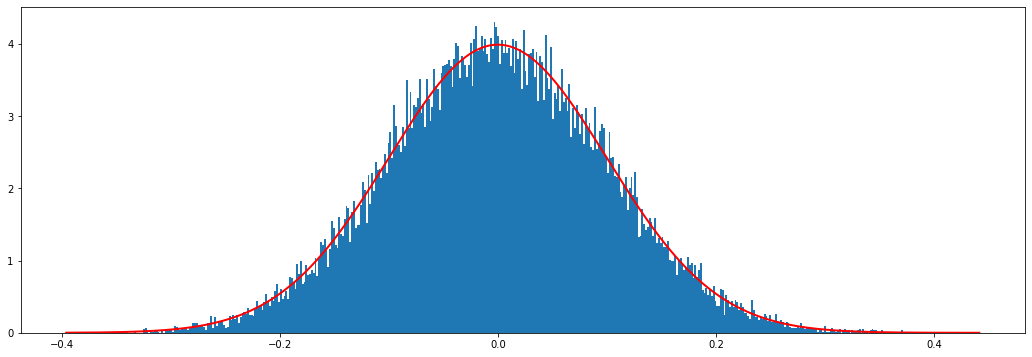

In [4]:
#Vary the mean and SD to generate different plots
mean1 = 0 #given
sd1 = 0.1 #given
no = 36525
c = np.random.normal(loc = mean1, scale = sd1, size = no) # gives normal distribution values at random
# plot to see if the values belong to normal distribution
fig = plt.figure(figsize=(18,6))
n, bins, patches = plt.hist(c, 500, normed=True) #hist
hist1 = norm1(mean1, sd1, bins)
plot1 = hist1.dist_curve()

In [5]:
len(c), len(bins) # 36525 values were grouped into 501 intervals

(36525, 501)

Plot the values of Normal distribution themselves

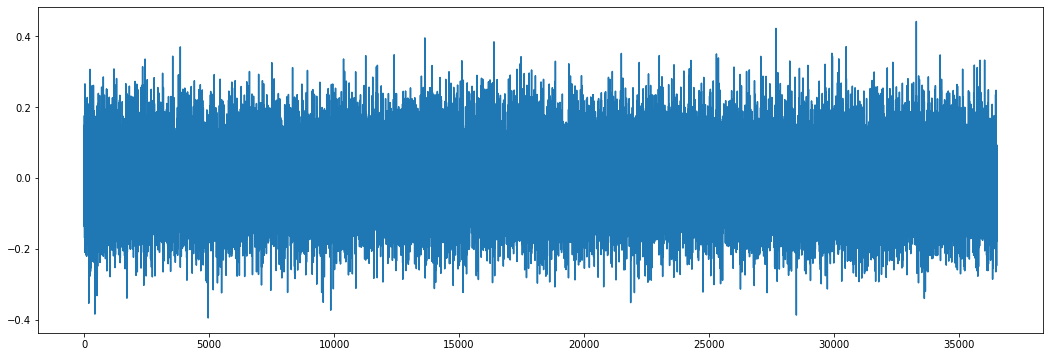

In [6]:
fig = plt.figure(figsize=(18,6))
plt.plot(range(0,len(c)),c)

In [7]:
min(c), max(c), len(c)

(-0.3956864354244618, 0.4414660136137301, 36525)

In [8]:
c = np.round(c, 4)

C:\Users\janu\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


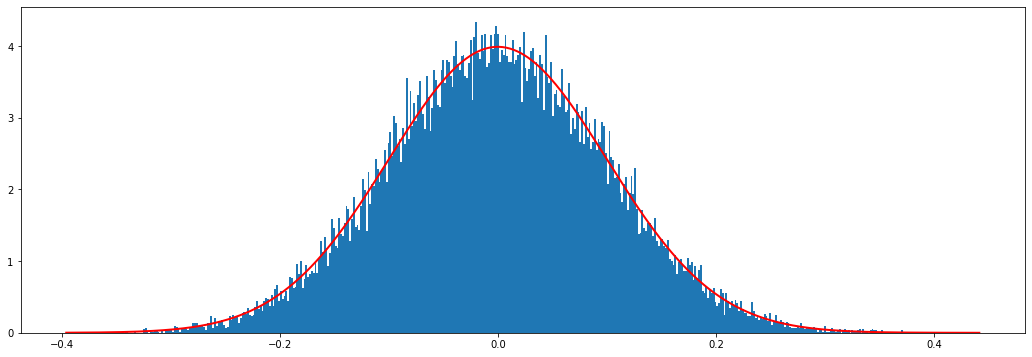

In [9]:
fig = plt.figure(figsize=(18,6))
n, bins, patches = plt.hist(c, 500, normed=True) #hist
hist1 = norm1(mean1, sd1, bins)
plot1 = hist1.dist_curve()

In [10]:
len(c), len(bins) # 36525 values were grouped into 501 intervals

(36525, 501)

Plot the values of Normal distribution themselves

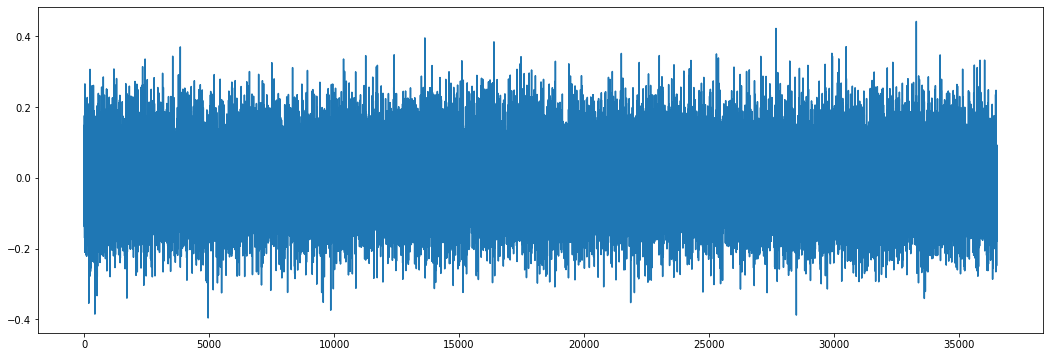

In [11]:
fig = plt.figure(figsize=(18,6))
plt.plot(range(0,len(c)),c)

In [12]:
min(c), max(c), len(c)

(-0.3957, 0.4415, 36525)

In [13]:
p = [1.0] * no

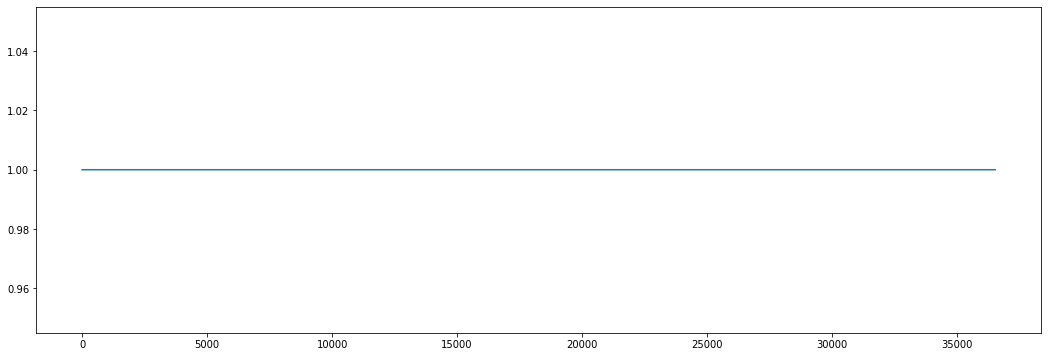

In [14]:
fig = plt.figure(figsize=(18,6))
plt.plot(range(0,len(p)), p)

In [15]:
no/15

2435.0

In [16]:
for i in range(0,len(p)//15):
    if i == 0:
        p[i] = 1.0
        
    else:
        p[i] = (p[i-1] * c[i-1]) + p[i-1]

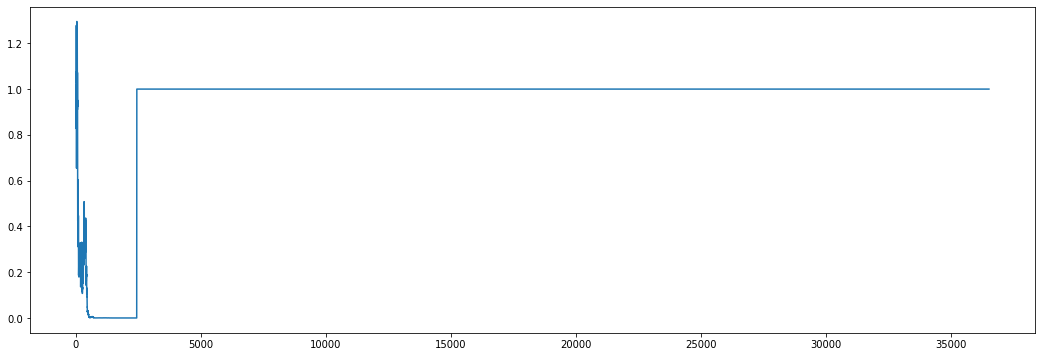

In [17]:
fig = plt.figure(figsize=(18,6))
plt.plot(range(0,len(p)), p)

In [18]:
p[2000]

1.958327607667168e-07

In [19]:
min(p), max(p)

(3.509761715611505e-08, 1.2954411699175965)

In [20]:
for i in range(0,len(p)//7):
    if i == 0:
        p[i] = 1.0
        
    else:
        p[i] = (p[i-1] * c[i-1]) + p[i-1]

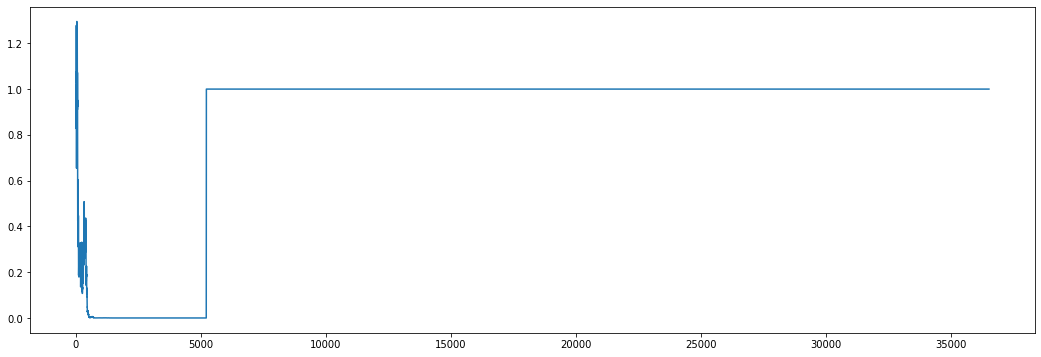

In [21]:
fig = plt.figure(figsize=(18,6))
plt.plot(range(0,len(p)), p)

In [22]:
min(p), max(p)

(9.679188382099894e-11, 1.2954411699175965)

In [23]:
for i in range(0,len(p)//2):
    if i == 0:
        p[i] = 1.0
        
    else:
        p[i] = (p[i-1] * c[i-1]) + p[i-1]

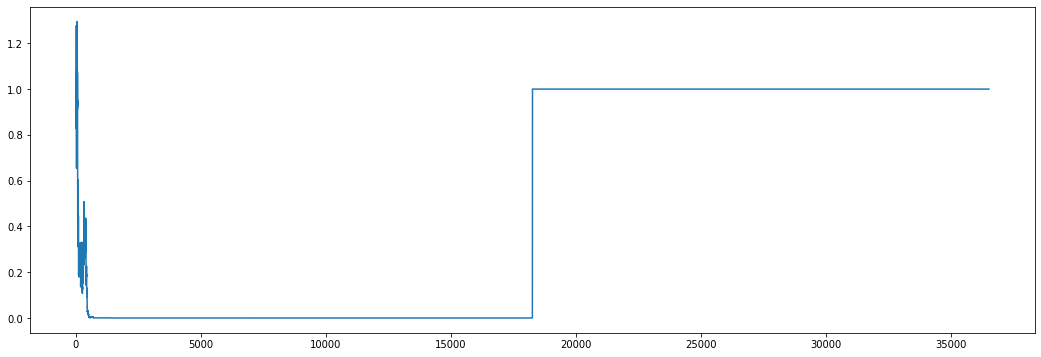

In [24]:
fig = plt.figure(figsize=(18,6))
plt.plot(range(0,len(p)), p)

In [25]:
min(p), max(p)

(1.1781172917481618e-41, 1.2954411699175965)

In [26]:
for i in range(0,len(p)):
    if i == 0:
        p[i] = 1.0
        
    else:
        p[i] = (p[i-1] * c[i-1]) + p[i-1]

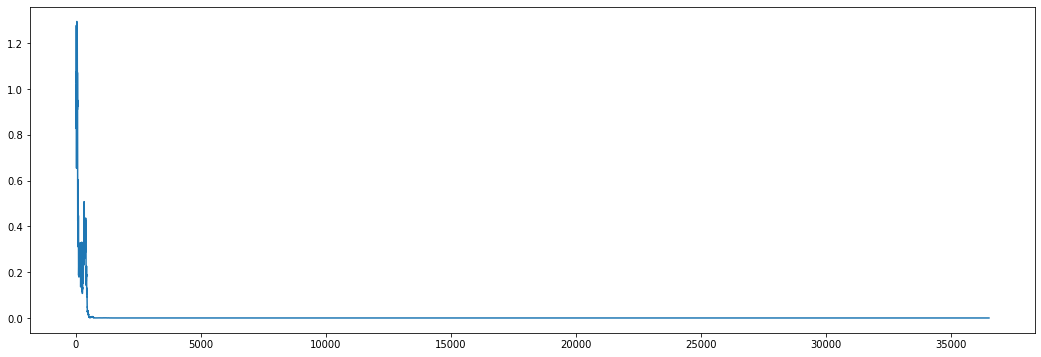

In [27]:
fig = plt.figure(figsize=(18,6))
plt.plot(range(0,len(p)), p)

In [28]:
min(p), max(p)

(1.5663737142751445e-81, 1.2954411699175965)